In [1]:
import pandas as pd

from pandas import datetime

import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('sales-cars.csv')

In [3]:
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
sales.Month = pd.to_datetime(sales.Month)

In [5]:
sales.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [7]:
sales.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [13]:
sales.set_index('Month', inplace=True)

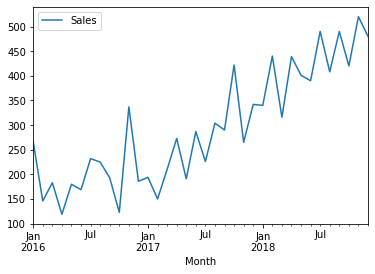

In [17]:
sales.plot()
plt.show()

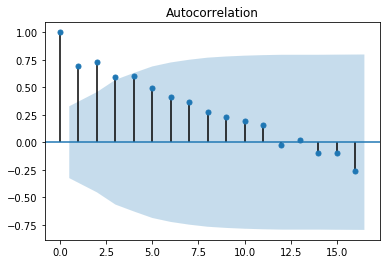

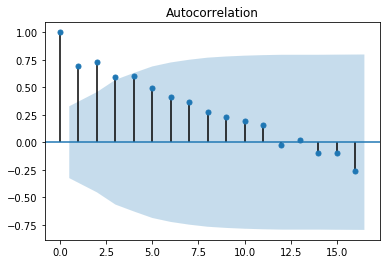

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sales)

In [19]:
sales

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [20]:
sales_diff = sales.diff(periods=1)

In [24]:
sales_diff = sales_diff[1:]
sales_diff

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


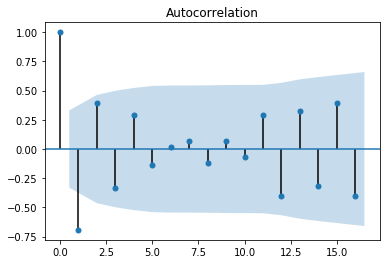

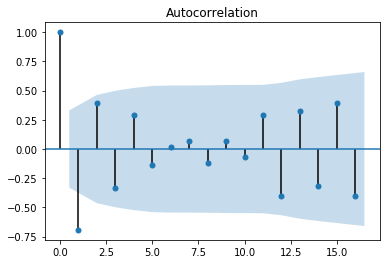

In [25]:
plot_acf(sales_diff)

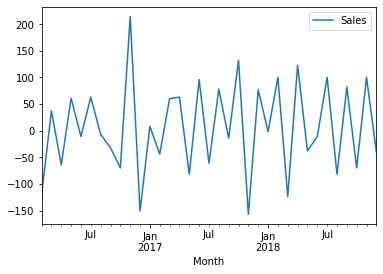

In [27]:
sales_diff.plot()
plt.show()

In [30]:
x= sales.values

In [61]:
train = x[0:26]
test = x[26:]

In [35]:
train.size

27

In [36]:
test.size

9

In [44]:
from statsmodels.tsa.ar_model import AR

from sklearn.metrics import mean_squared_error

model_ar = AR(train)

model_ar_fit = model_ar.fit()

In [57]:
pred = model_ar_fit.predict(start=27,end=36)

In [52]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [58]:
pred

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

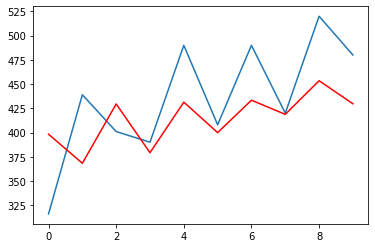

In [62]:
plt.plot(test)
plt.plot(pred, color ='red')

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
model_arima = ARIMA(train, order = (3,2,3))

model_arima_fit = model_arima.fit()

print(model_arima_fit.aic)

277.47033188225373


In [86]:
predictions = model_arima_fit.forecast(steps=10)[0]

In [87]:
predictions

array([390.70848474, 402.72435669, 404.10771394, 486.04067796,
       511.15291766, 519.96344725, 506.0216587 , 548.66270842,
       602.03675263, 642.60386467])

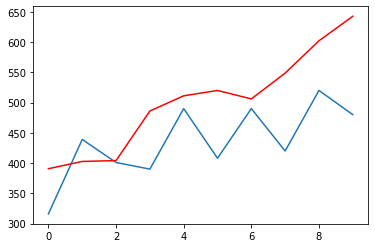

In [88]:
plt.plot(test)
plt.plot(predictions, color = 'red')

In [72]:
mean_squared_error(test,predictions)

3800.141793624968

In [77]:
import itertools
p=d=q=range(0,10)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [83]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order = pa)
#         model_arima_fit = model_arima.fit()
#         print(param, model_arima_fit.aic)

SyntaxError: unexpected EOF while parsing (<ipython-input-83-e993c7bf6ec8>, line 7)

In [84]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 308.0096539919454
(0, 0, 1) 307.97137973444137
(0, 0, 2) 304.79519647477224
(0, 0, 3) nan
(0, 0, 4) 300.1530963242773
(0, 0, 5) nan
(0, 0, 6) 301.0276974411338
(0, 0, 7) 302.99374329325406
(0, 1, 0) 298.93626636014545
(0, 1, 1) 285.7698375444133
(0, 1, 2) 285.9520236928739
(0, 1, 9) 289.7409850687381
(0, 2, 0) 315.1545685734785
(0, 2, 1) 292.53431595056406
(1, 0, 0) 305.63554972557444
(1, 0, 1) 302.53147161849785
(1, 0, 2) 300.8676749909753
(1, 1, 0) 287.58903298136056
(1, 1, 1) 287.0668643941275
(1, 1, 2) 289.35957416363544
(1, 1, 4) 288.3614570717177
(1, 2, 0) 293.2001957478168
(1, 2, 1) 281.878159993629
(2, 0, 0) 300.6312882419319
(2, 0, 1) 357.45600648809125
(2, 0, 4) 318.93850313713085
(2, 1, 0) 289.19073031632536
(2, 1, 1) 287.87364871383693
(2, 1, 5) 286.63784299473707
(2, 2, 0) 292.8070116737182
(2, 2, 1) 283.53489172234686
(2, 2, 2) 280.269106681931
(3, 0, 0) 302.6235975818456
(3, 0, 5) 314.62720597956036
(3, 1, 0) 284.8544454751427
(3, 1, 1) 285.9356677925051
(3, 1,